In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
train_size = len(x_train_1)
epoch = 100
NUM_ITER = train_size * epoch
lr = 0.01
acc = np.zeros(epoch)

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 2], name='feature')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='label')
# single perceptron
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
b = tf.Variable(tf.zeros([1]),tf.float32,name='b')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [8]:
out = tf.matmul(X,W)+b
Y_hat = tf.nn.sigmoid(out)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=out))
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cost)
correct_pred = tf.equal(tf.round(Y_hat),tf.round(Y))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(NUM_ITER):
        sess.run(train_step, feed_dict={X: x_train_1, Y: y_train_1})
        if i%train_size == 0:
            acc[i//train_size] = sess.run(accuracy, feed_dict={X: x_train_1, Y: y_train_1})
            print("epoch"+str(i/train_size+1)+"\tAccuracy={:.3f}".format(acc[i//train_size]))
    w_ = np.squeeze(sess.run(W))
    b_ = np.squeeze(sess.run(b))
    outcome = sess.run(accuracy, feed_dict={X: x_test_1, Y: y_test_1})

print("Test\t"+"\tAccuracy={:.3f}".format(outcome))

epoch1.0	Accuracy=0.657
epoch2.0	Accuracy=0.962
epoch3.0	Accuracy=0.971
epoch4.0	Accuracy=0.971
epoch5.0	Accuracy=0.990
epoch6.0	Accuracy=1.000
epoch7.0	Accuracy=1.000
epoch8.0	Accuracy=1.000
epoch9.0	Accuracy=1.000
epoch10.0	Accuracy=1.000
epoch11.0	Accuracy=1.000
epoch12.0	Accuracy=1.000
epoch13.0	Accuracy=1.000
epoch14.0	Accuracy=1.000
epoch15.0	Accuracy=1.000
epoch16.0	Accuracy=1.000
epoch17.0	Accuracy=1.000
epoch18.0	Accuracy=1.000
epoch19.0	Accuracy=1.000
epoch20.0	Accuracy=1.000
epoch21.0	Accuracy=1.000
epoch22.0	Accuracy=1.000
epoch23.0	Accuracy=1.000
epoch24.0	Accuracy=1.000
epoch25.0	Accuracy=1.000
epoch26.0	Accuracy=1.000
epoch27.0	Accuracy=1.000
epoch28.0	Accuracy=1.000
epoch29.0	Accuracy=1.000
epoch30.0	Accuracy=1.000
epoch31.0	Accuracy=1.000
epoch32.0	Accuracy=1.000
epoch33.0	Accuracy=1.000
epoch34.0	Accuracy=1.000
epoch35.0	Accuracy=1.000
epoch36.0	Accuracy=1.000
epoch37.0	Accuracy=1.000
epoch38.0	Accuracy=1.000
epoch39.0	Accuracy=1.000
epoch40.0	Accuracy=1.000
epoch41.0

<h2>Plot</h2>

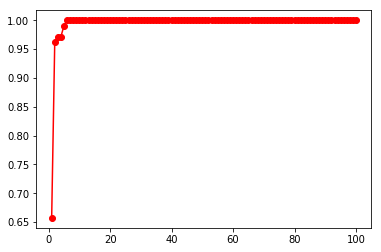

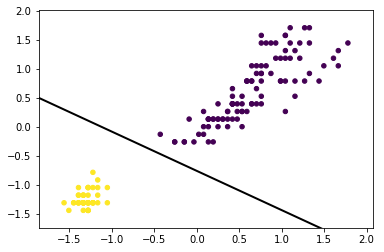

In [10]:
n = []
for i in range(100):
    n.append(i+1)
plt.plot(n, acc, 'r-o')
plt.show()
plot_x1 = np.array([min(x_1['petal_length'])-0.3, max(x_1['petal_length'])+0.3])
plot_y1 = 1 / w_[1] * (-w_[0] * plot_x1 - b_)
plt.plot(plot_x1, plot_y1, color='k', linewidth=2)
plt.scatter(x_1['petal_length'], x_1['petal_width'], c=np.squeeze(y_1), s=20, cmap='viridis')
plt.xlim([min(x_1['petal_length'])-0.3, max(x_1['petal_length'])+0.3]);
plt.ylim([min(x_1['petal_width'])-0.3, max(x_1['petal_width'])+0.3]);
plt.show()

<h1>Part b:</h1>

In [ ]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

<h2>Define hyper-parameter</h2>

<h2>Define Placeholder and Variables</h2>

In [ ]:
tf.reset_default_graph()

<h2>Define update rule and accuracy</h2>

<h2>Execute training</h2>

<h2>Plot</h2>

<h1>Part c:</h1>

In [ ]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

<h2>Define hyper-parameters</h2>

<h2>Define placehoder and variables</h2>

In [ ]:
tf.reset_default_graph()

<h2>Define the neural network</h2>

<h2>Define cost function and accuracy</h2>

<h2>Execute training</h2>

<h2>Plot</h2>